## Real or Fake?<a id='_Real_or_Fake?'></a>
* [Introduction](#_Introduction)
  * [Imports](#_Imports)
  * [Load The Data](#_Load_The_Data)
  * [Visualizing 'true' Headline Data](#_Visualizing_"true"_Headline_Data)
      * [Word Frequency Analysis](#_Word_Frequency_Analysis)
      * [Sentence Length Analysis](#_Sentence_Length_Analysis)
      * [Average Word Length Analysis](#_Average_Word_Length_Analysis)
  * [Most Common Words In 'true' Headlines](#_Most_Common_Words_In_"true"_Headlines)
  * [Bigrams and Trigams for 'true' Headlines](#_Bigrams_and_Trigrams_for_"true"_Headlines)
  * [Visualizing 'fake' Headline Data](#_Visualizing_"fake"_Headline_Data)
      * [Word Frequency Analysis](#_Word_Frequency_Analysis)
      * [Sentence Length Analysis](#_Sentence_Length_Analysis)
      * [Average Word Length Analysis](#_Average_Word_Length_Analysis)
  * [Most Common Words In 'fake' Headlines](#_Most_Common_Words_In_"fake"_Headlines)
  * [Bigrams and Trigams for 'fake' Headlines](#_Bigrams_and_Trigrams_for_"fake"_Headlines)
  * [Feature Engineering for Lexical Diversity](#_Feature_Engineering_for_Lexical_Diversity)
  * [Lexical Diversity for All News](#_Lexical_Diversity_for_All_News)
      * [Lexical Diversity Within Text](#_Lexical_Diversity_Within_Text)
      * [Lexical Diversity Within Titles](#_Lexical_Diversity_Within_Titles)
  * [Summary](#_Summary)
  

## Introduction<a id='_Introduction'></a>

The advent of the internet is arguably the most important event in human history. One of the dangers present when surfing the web is consuming false information. Any internet user would benefit from understanding what fake news looks like. In this notebook, we will be focusing on identifying the distinguishing features in real news and fake news.

Let's start by asking a few questions of the dataset. How similar are the news headlines? How different are they from each other? Are there words or phrases they have in common? What are the similarities and differences in lexical diversity between real and fake news? What can we conclude about what fake news looks like?

## Imports<a id='_Imports'></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pd.set_option('display.max_columns', 100)

In [2]:
os.chdir(r'C:\Users\daenj\OneDrive\Desktop\Datasets\RealOrFakeNews\archive')
os.getcwd()

'C:\\Users\\daenj\\OneDrive\\Desktop\\Datasets\\RealOrFakeNews\\archive'

## Load The Data<a id='_Load_The_Data'></a>

In [3]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Visualize 'true' Headline Data<a id='_Visualize_"true"_Headline_Data'></a>

We'll start by exploring text statistics visualizations of the 'true' headlines.

## Word Frequency Analysis<a id='_Word_Frequency_Analysis'></a>

Text(0, 0.5, 'Count')

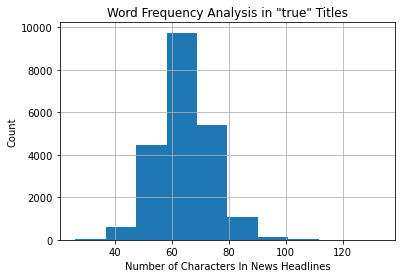

In [6]:
true['title'].str.len().hist()
plt.title('Word Frequency Analysis in "true" Titles')
plt.xlabel('Number of Characters In News Headlines')
plt.ylabel('Count')

The number of characters in 'true' headlines ranges from roughly 10 to 110. The most frequent number of characters range from 60 to 70.

## Sentence Length Analysis<a id='_Sentence_Length_Analysis'></a>

Text(0, 0.5, 'Count')

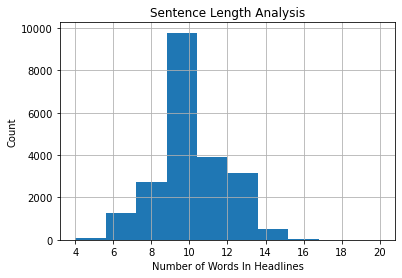

In [7]:
true['title'].str.split().\
    map(lambda x: len(x)).\
    hist()
plt.title('Sentence Length Analysis')
plt.xlabel('Number of Words In Headlines')
plt.ylabel('Count')

The number of words in 'true' headlines ranges from about 6 to 15. The most frequent amount of words in headlines are about 9 or 10. 

## Average Word Length Analysis<a id='_Average_Word_Length_Analysis'></a>

Text(0, 0.5, 'Count')

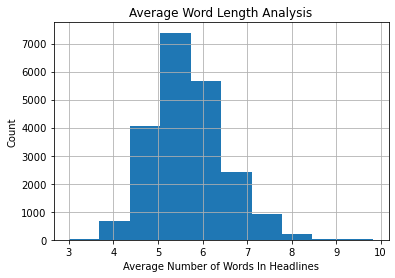

In [8]:
true['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Average Word Length Analysis')
plt.xlabel('Average Number of Words In Headlines')
plt.ylabel('Count')

In most headlines, the average number of words is 5. An attention grabbing title is important to get people to read your work. What are the most common words in 'true' titles?

## Most Common Words In 'true' Headlines<a id='_Most_Common_Words_In_"true"_Headlines'></a>

In [9]:
import nltk
stop_words = nltk.corpus.stopwords.words("english")
stopwords = set(stop_words)

In [10]:
corpus=[]
new= true['title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

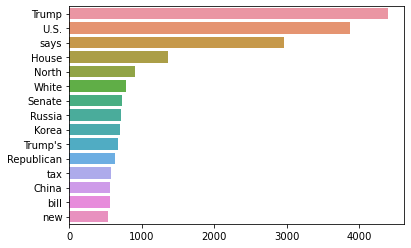

In [11]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

'Trump' and 'U.S' are the two most used words in 'true' headlines. The third most used word is 'says', implying that relevant people have been interviewed for the article. Tying a headline by way of a direct quote from the article is a solid way to avoid clickbait, confusing headlines. The frequency of the other words are significantly lower than the top 3.

## Bigrams and Trigrams For 'true' Headlines<a id='_Bigrams_and_Trigrams_For_"true"_Headlines'></a>

Let's investigate what the most common 2 and 3 word phrases are in these news headlines.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

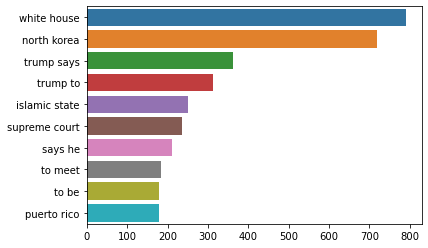

In [13]:
plot_top_ngrams_barchart(true['title'],2)

THe top 3 two word phrases are 'white house', 'north korea', and 'trump says'. These two word phrases don't tell us much information, will 3 or higher word phrases yield deeper insights? 

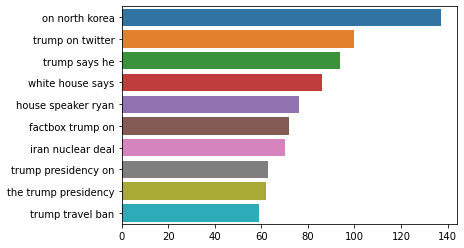

In [14]:
plot_top_ngrams_barchart(true['title'],3)

Here we start to see the three word phrases we have heard over and over on social media. The second most used phrase is 'trump on twitter', no doubt referencing the many tweets Trump wrote during his presidency. Most of the phrases are variations on something about the Trump presidency. These include things Trump has said and events or ongoing situations like the travel ban and the Iran nuclear deal. What do pentagrams look like in these titles?

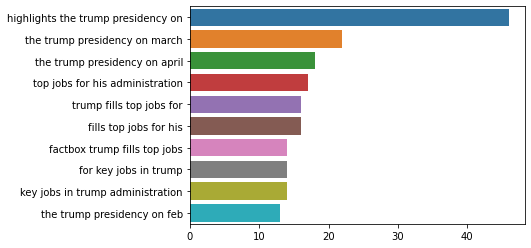

In [15]:
plot_top_ngrams_barchart(true['title'],5)

The top 3 results are 5 word phrases relating to the Trump presidency. The most common feature of these phrases are the references to jobs within the Trump administration.

We have a clear view of what these 'true' titles look like and a rough idea of what the 'true' articles are about. Let's keep this in mind as we look at the 'fake' title data.

## Visualize 'fake' Title Data<a id='_Visualize_"fake"_Title_Data'></a>

## Word Frequency Analysis<a id='_Word_Frequency_Analysis'></a>

Text(0, 0.5, 'Count')

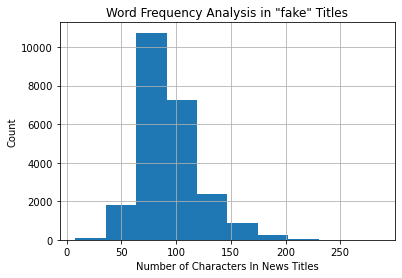

In [16]:
fake['title'].str.len().hist()
plt.title('Word Frequency Analysis in "fake" Titles')
plt.xlabel('Number of Characters In News Titles')
plt.ylabel('Count')

The number of characters in 'fake' headlines ranges looks similar to the 'true' headlines. The most frequent number of characters range from about 60 to 70.

## Sentence Length Analysis<a id='_Sentence_Length_Analysis'></a>

Text(0, 0.5, 'Count')

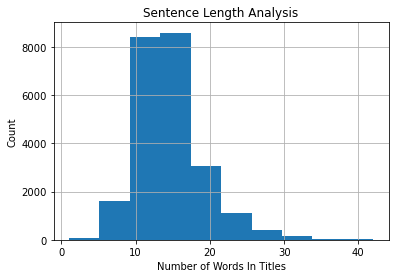

In [17]:
fake['title'].str.split().\
    map(lambda x: len(x)).\
    hist()
plt.title('Sentence Length Analysis')
plt.xlabel('Number of Words In Titles')
plt.ylabel('Count')

The number of words in 'fake' headlines ranges from about 1 to 40. This range of words is much wider than in the 'true' headlines. A handful of headlines contain 30+ words! Most headlines have about 10 to 17 words in them.

## Average Word Length Analysis<a id='_Average_Word_Length_Analysis'></a>

Text(0, 0.5, 'Count')

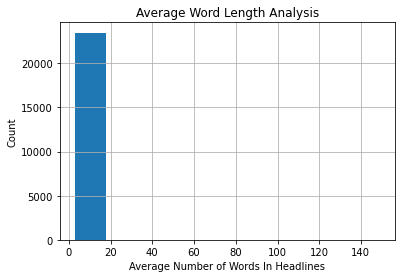

In [18]:
fake['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Average Word Length Analysis')
plt.xlabel('Average Number of Words In Headlines')
plt.ylabel('Count')

In all 'fake' headlines, the average number of words is less than 20. This is similar to the average number of words in 'true' headlines. Besides sentence length, the text statistics visualization didn't yield any startling differences between both sets of headlines. Let's take a look at the ngrams and most common words in these headlines.

## Most Common Words In 'fake' Headlines<a id='_Most_Common_Words_In_"fake"_Headlines'></a>

In [19]:
f_corpus=[]
f_new= fake['title'].str.split()
f_new=f_new.values.tolist()
f_corpus=[word for i in f_new for word in i]

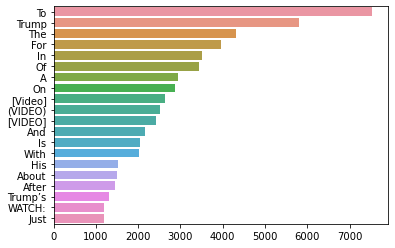

In [20]:
f_counter=Counter(f_corpus)
most=f_counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

Both types of news are dominated by headlines relating to former U.S. president Donald Trump. Just by observing the most common words in these titles, it appears that real news uses anecdotal dialouge to create context for the article. 

On the flip side, fake news appear to rely on videos to get clicks on articles. Watching videos appears to make up the bulk of the content within these fake news articles. Fake news likes to use famous democrats for clicks as well. 

## Bigrams and Trigrams For 'fake' Headlines<a id='_Bigrams_and_Trigrams_For_"fake"_Headlines'></a>

In [21]:
def plot_top_fake_ngrams_barchart(text, n=2):
    

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

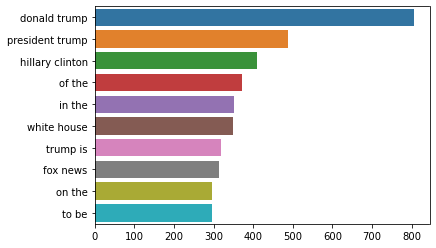

In [22]:
plot_top_fake_ngrams_barchart(fake['title'],2)

Both of the datasets refer to Trump, but the 'fake' headlines has 'donald trump' and 'president trump' as the most used two word phrases in these headlines. In third place is 'hillary clinton', a name that is infamous among right-wing circles. Fake news also uses 'fox news' over 300 hundred times in this dataset. Fox news did not appear in any of the ngrams for the 'true' headlines. Let's move on to trigrams!

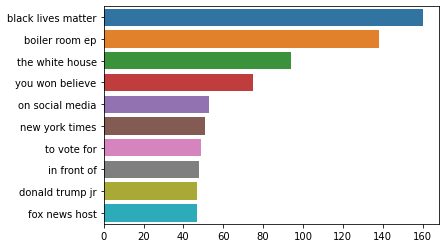

In [23]:
plot_top_fake_ngrams_barchart(fake['title'],3)

These trigrams are the start of the polarization fake news is infamous for. 'black lives matter' took the top spot with about 160 instances. The next trigram, 'boiler room ep' appears to be a podcast. Let's check out the pentagrams.

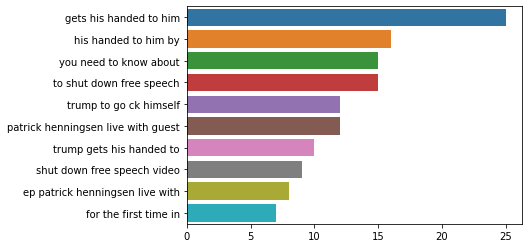

In [24]:
plot_top_fake_ngrams_barchart(fake['title'],5)

The top pentagram, 'gets his handed to him' is the most used 5 word phrase. It occured about 25 times. This is where the comparison between 'true' and 'fake' headlines gets interesting. Comparing the pentagrams of both datasets, you can get a glimpse of the junk fake news is peddling. Granted, these particular phrases don't appear too often, but the comparison of 'true' and 'fake' pentagrams are telling. There is a lot of promotion going on for what appears to be a podcast(s). 

## Feature Engineering For Lexical Diversity<a id='_Feature_Engineering_For_Lexical_Diversity'></a>

In [25]:
true = true.drop(true.index[8970])
fake = fake.drop(fake.index[18994])
fake = fake.drop(fake.index[11531])
fake = fake.drop(fake.index[12410])
fake = fake.drop(fake.index[16273])
fake = fake.drop(fake.index[11788])
fake = fake.drop(fake.index[19557])
fake = fake.drop(fake.index[18994])
fake = fake.drop(fake.index[11531])

In [26]:
fake = fake.drop(fake.index[12410])
fake = fake.drop(fake.index[16273])
fake = fake.drop(fake.index[11788])
fake = fake.drop(fake.index[11296])
fake = fake.drop(fake.index[11247])
fake = fake.drop(fake.index[12579])
fake = fake.drop(fake.index[12578])
fake = fake.drop(fake.index[12574])

In [27]:
fake_title = fake['title']
fake_text = fake['text']

In [28]:
true_text = true['text']
true_title = true['title']

In [29]:
true['is_fake'] = 0 # contains only news
fake['is_fake'] = 1 # contains only fakes

# merge them into one file
data = pd.concat([true, fake])
data = data.reset_index()
# don't forget to shuffle them. 
# Otherwise all news are on top and all fakes are on the bottom
data = data.sample(frac=1)

In [30]:
data = data.drop(['date'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25, random_state=42)
X_train = train.drop('is_fake', axis=1)
y_train = train['is_fake']
X_test = test.drop('is_fake', axis=1)
y_test = test['is_fake']

Both news types are roughly equal among both the train and test data. Let's split the training data into news and fake news to explore lexical diversity among them. 

In [32]:
train_news = X_train.loc[(y_train==0),:]
train_fake = X_train.loc[(y_train==1),:]

## Lexical Diversity of All News<a id='_Lexical_Diversity_of_All_News'></a>

In this notebook, we will define lexical diversity as the number of unique words in one (target) category / number of words in both (target) categories

In [33]:
# lexical diversity
def lexical_dive(text):
    return len(set(text)) / len(text)

## Lexical Diversity Within Text<a id='_Lexical_Diversity_Within_Text'></a>

In [34]:
lexicalDiversity = [lexical_dive(text) for text in true_text]
tokens = [len(text) for text in true_text]
types = [len(set(text)) for text in true_text]
title = [text for text in true_text]

ld = pd.DataFrame({'title': title, 'tokens': tokens, 'types': types,
                   'lexical_diversity': lexicalDiversity})

ld.sort_values(by='lexical_diversity', ascending=False)

,title,tokens,types,lexical_diversity
4544,WASHINGTON (Reuters) - Lockheed Martin Corp is...,168,49,0.291667
6131,WASHINGTON (Reuters) - U.S. President Donald T...,152,42,0.276316
16058,MADRID (Reuters) - Spain s cabinet will hold a...,152,39,0.256579
19358,"FLORENCE, Italy (Reuters) - Britain wants to b...",156,40,0.256410
20490,(Reuters) - The center of Hurricane Irma made ...,165,42,0.254545
...,...,...,...,...
3319,(Reuters) - Following is the full text of form...,18541,69,0.003721
14756,"CARACAS (Reuters) - Last March, Chief Justice ...",17999,65,0.003611
2594,WASHINGTON (Reuters) - I am voluntarily provid...,21559,74,0.003432
8465,"ALGONAC, MICH.—Parker Fox drifted out of the D...",21661,73,0.003370


There is a wide range between max and min lexical diversity in text from the 'true' data. The more tokens and types, the lower the lexical diversity. The tokens within the 'true' dataset range from about 150 to about 30000. 

In [35]:
fake_lexicalDiversity = [lexical_dive(text) for text in fake_text]
tokens = [len(text) for text in fake_text]
types = [len(set(text)) for text in fake_text]
title = [text for text in fake_text]

ld = pd.DataFrame({'title': title, 'tokens': tokens, 'types': types,
                   'lexical_diversity': fake_lexicalDiversity})

ld.sort_values(by='lexical_diversity', ascending=False)

,title,tokens,types,lexical_diversity
11632,,1,1,1.000000
11909,,1,1,1.000000
11878,,1,1,1.000000
11883,,1,1,1.000000
11887,,1,1,1.000000
...,...,...,...,...
19605,There have been many articles written about Ge...,46960,74,0.001576
17836,We just discovered another reason NOT to suppo...,49705,74,0.001489
9731,We just discovered another reason NOT to suppo...,49705,74,0.001489
22287,Funny how secrets travel. I d start to believ...,51794,76,0.001467


There are lots of text entries in the 'fake' dataset that don't contain text. This could be explained by having news sources that contain videos or other media instead of text. These entries artificially bump the 'fake' datasets lexical diversity for it's text. The types appear to max out in the mid-seventies, similar to the 'true' text. The tokens range from 1 to about 50000. The lexical diversity range is more dramatic for the 'fake' data than the 'true' data. We will compare the two later in this notebook.

## Lexical Diversity Within Titles<a id='_Lexical_Diversity_Within_Titles'></a>

In [36]:
lexicalDiversity_title = [lexical_dive(text) for text in true_title]
tokens = [len(text) for text in true_title]
types = [len(set(text)) for text in true_title]
title = [text for text in true_title]

ld = pd.DataFrame({'title': title, 'tokens': tokens, 'types': types,
                   'lexical_diversity': lexicalDiversity_title})

ld.sort_values(by='lexical_diversity', ascending=False)

,title,tokens,types,lexical_diversity
13483,The Adoration Of Kim Jong Un,28,19,0.678571
5290,Trump on Twitter (Feb 24) - FBI leaks,37,25,0.675676
70,Trump on Twitter (Dec 20) - Tax Bill,36,23,0.638889
11482,Turkey's parliament approves 2018 budget,40,25,0.625000
5479,The Trump presidency on Feb. 13 at 8:05 P.M. EST,48,30,0.625000
...,...,...,...,...
15581,Nigeria offers to meet militants after ceasefi...,72,16,0.222222
18096,NZ opposition Labour says in a stronger positi...,99,22,0.222222
19171,Iraqi government asks Kurdistan regional gover...,109,24,0.220183
16456,Israel willing to resort to military action to...,92,20,0.217391


The high end of the lexical diversity range for 'true' titles has diminished and the low end has increased in relation to the 'true' text. Let's compare the 'true' titles to the 'fake' titles.

In [37]:
faketitle_lexicalDiversity = [lexical_dive(text) for text in fake_title]
tokens = [len(text) for text in fake_title]
types = [len(set(text)) for text in fake_title]
title = [text for text in fake_title]

ld = pd.DataFrame({'title': title, 'tokens': tokens, 'types': types,
                   'lexical_diversity': faketitle_lexicalDiversity})

ld.sort_values(by='lexical_diversity', ascending=False)

,title,tokens,types,lexical_diversity
21212,No Words… [VIDEO],17,15,0.882353
18920,Homepage,8,7,0.875000
22763,SUNDAY SCREENING: Overpill (2017),33,26,0.787879
21980,SUNDAY SCREENING: Overpill (2017),33,26,0.787879
22314,Boiler Room EP #87,18,14,0.777778
...,...,...,...,...
16758,BREAKING UPDATE…Last Holdout: “I DECLARE WAR A...,279,47,0.168459
14874,A Timeless Thanksgiving Address From Ronald Re...,190,32,0.168421
15499,UPDATE: JUDGE ORDERS CANCELLATION OF REDSKINS ...,159,26,0.163522
17217,UPDATE: JUDGE ORDERS CANCELLATION OF REDSKINS ...,159,26,0.163522


The lexical diversity range narrowed in the 'fake' titles just like it did in the 'true' titles. What caught my attention was the difference between titles in each dataset. The 'true' titles have headlines that one would expect from media organizations. The 'fake' news headlines use all caps as well as phrases and words that invoke a strong reaction like 'BREAKING' or 'MUST WATCH VIDEO'. It also looks like the 'fake' news titles are used as promos for podcast episodes or videos instead of actual reporting.  

In [ ]:
# another measure for lexical diversity
import string
def lexical_diversity(data, other_data, feature):
    # ignore capital letters
    column = data[feature].str.lower() 
    # create one text from the column
    text = ' '.join(column)
    # drop punctuation
    exclude = set(string.punctuation)
    words = ''.join(char for char in text if char not in exclude)
    # create a list of wordsw instead of one huge text
    words_splitted = words.split()
    
    # analogously
    other_column = other_data[feature].str.lower() 
    other_text = ' '.join(other_column)
    other_words = ''.join(char for char in other_text if char not in exclude)
    other_words_splitted = other_words.split()
    # lexical diversity measure
    return len(set(words_splitted)) / (len(words_splitted) + len(other_words_splitted))

print(f'Real News: {lexical_diversity(data=train_news, other_data=train_fake, feature="text")}')
print(f'Fake News: {lexical_diversity(data=train_fake, other_data=train_news, feature="text")}')

Fake news has about double the lexical diversity as real news. Authors of fake news appear to use a wider vocabulary in their news articles. Is this true for the titles? Clicks are important in the digital age, what keywords are used most frequently in news titles?

## Summary<a id='_Summary_'></a>

Determining whether information you consume is fake or not begins with the title of the article you'd like to read. Real news is more likely to inlcude anecdotal dialouge in their headlines, along with a more neutral, sterile selection of words and phrases. Fake news headlines do just about the exact opposite, purposefully using loaded language to get a reaction from the internet user. As far as actual text goes, fake news leaves a lot to be desired. After dropping quite a few rows in the 'fake' data that contained no text, I was still left textless articles when I ran the lexical diversity code for the 'fake' text. Instead of disseminating information via text, fake news likes to promote videos and podcasts.